In [107]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import seaborn as sns

In [108]:
df = pd.read_csv('../Data/Modeling/character-predictions-modeling-encoded.csv')

In [109]:
df.head()

,name,title,male,dateOfBirth,dateOfDeath,house,book1,book2,book3,book4,...,Official,Other,Religious,Royalty,Scholar,Servant,Tribal Leader,Warrior,hasHouse,house_encoded
0,Meha,no title,0,265.0,500.0,unknown,0,0,0,0,...,False,True,False,False,False,False,False,False,0,299
1,Domeric Bolton,no title,1,279.0,297.0,House Bolton,0,1,0,1,...,False,True,False,False,False,False,False,False,1,11
2,Maron Greyjoy,no title,1,275.0,289.0,House Greyjoy,1,1,1,1,...,False,True,False,False,False,False,False,False,1,30
3,Walder Brax,no title,0,293.0,500.0,House Brax,0,1,1,1,...,False,True,False,False,False,False,False,False,1,4
4,Robert Flowers,Ser,1,275.0,500.0,Kingsguard,0,0,0,1,...,False,False,False,False,False,False,False,False,1,3


In [110]:
df = df.drop(columns=['name', 'title', 'house', 'category'])
df = pd.get_dummies(df, drop_first=True)
df = df.apply(pd.to_numeric, errors='coerce')
df = df.fillna(0)
scaler1 = StandardScaler()
scaler2 = MinMaxScaler()
df_stan = scaler1.fit_transform(df)
df_norm = scaler2.fit_transform(df)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

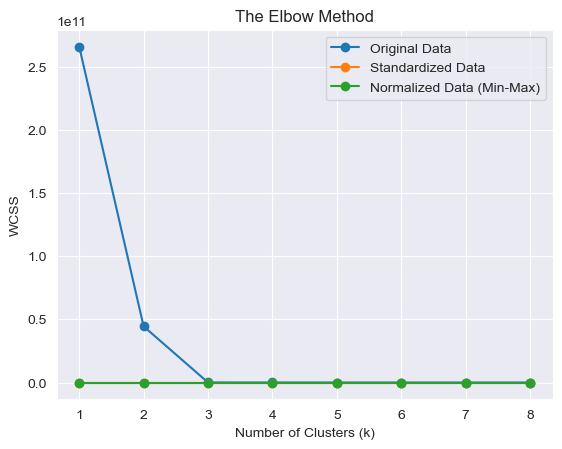

In [111]:
def count_wcss_scores(X, k_max):
    scores = []
    for k in range(1, k_max+1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        wcss = kmeans.score(X) * -1
        scores.append(wcss)
    return scores
wcss_vec_df = count_wcss_scores(df, 8)
wcss_vec_df_stan = count_wcss_scores(df_stan, 8)
wcss_vec_df_norm = count_wcss_scores(df_norm, 8)

x_ticks = list(range(1, len(wcss_vec_df) + 1))
plt.plot(x_ticks, wcss_vec_df, marker='o', label='Original Data')
plt.plot(x_ticks, wcss_vec_df_stan, marker='o', label='Standardized Data')
plt.plot(x_ticks, wcss_vec_df_norm, marker='o', label='Normalized Data (Min-Max)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.legend()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

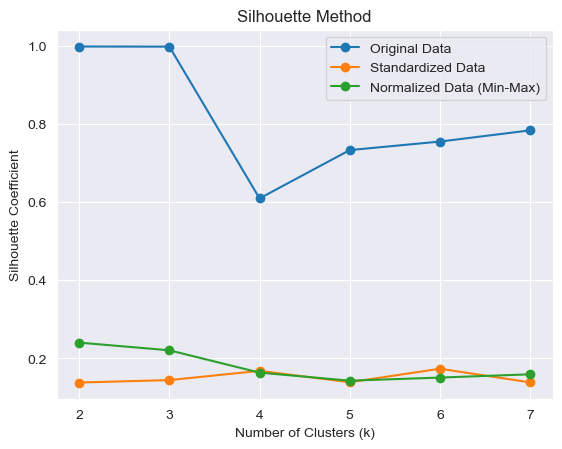

In [112]:
def calculate_silhouette_score(data):
    silhouette_scores = []
    for n in range(2, 8):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))
    return silhouette_scores

silhouette_df = calculate_silhouette_score(df)
silhouette_df_stan = calculate_silhouette_score(df_stan)
silhouette_df_norm = calculate_silhouette_score(df_norm)

x_ticks = list(range(2, 8))
plt.plot(x_ticks, silhouette_df, marker='o', label='Original Data')
plt.plot(x_ticks, silhouette_df_stan, marker='o', label='Standardized Data')
plt.plot(x_ticks, silhouette_df_norm, marker='o', label='Normalized Data (Min-Max)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Method')
plt.legend()
plt.show()

In [113]:
def plot_kmeans_clusters(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap='viridis')

    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=10, alpha=0.75)
    plt.title('K-means clusters')
    plt.show()

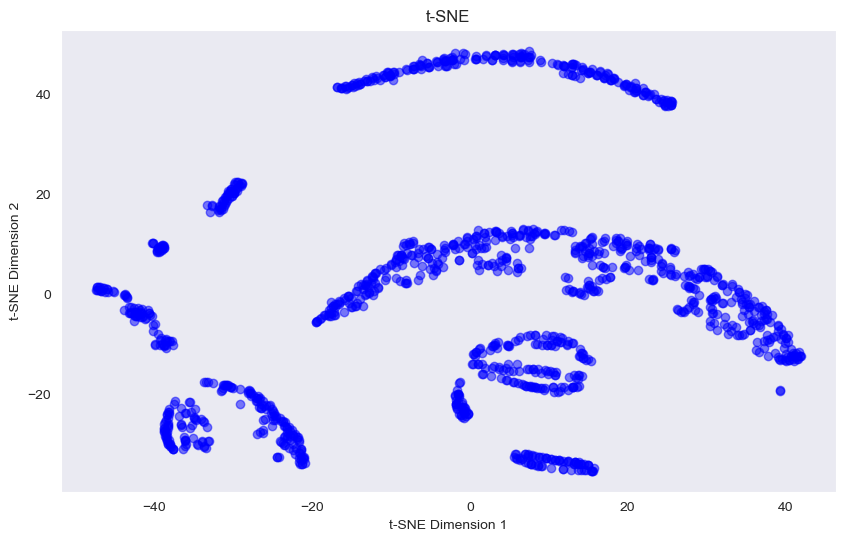

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


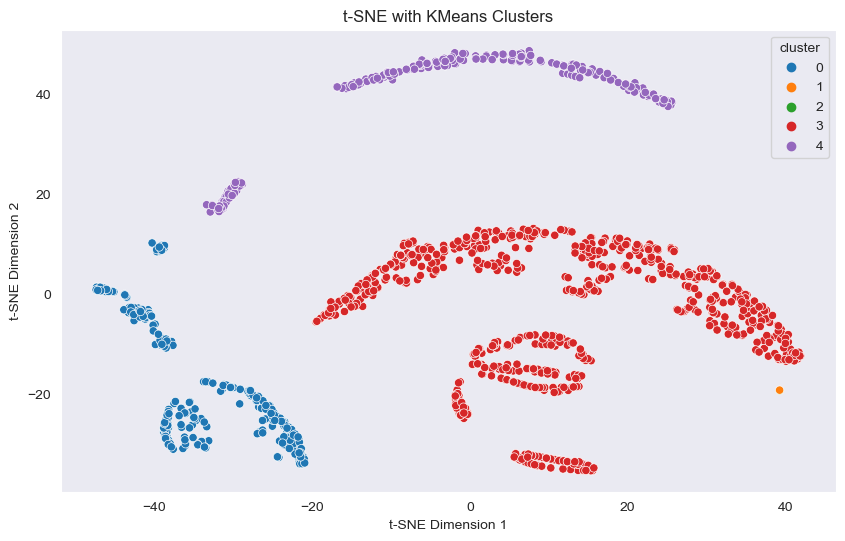

In [117]:
tsne = TSNE(n_components=2, random_state=123)
tsne_results = tsne.fit_transform(df)

plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c='blue', alpha=0.5)
plt.title('t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid()
plt.show()

kmeans = KMeans(n_clusters=5, random_state=123)
kmeans.fit(df)
df['cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=df['cluster'], palette='tab10', legend='full')
plt.title('t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid()
plt.show()

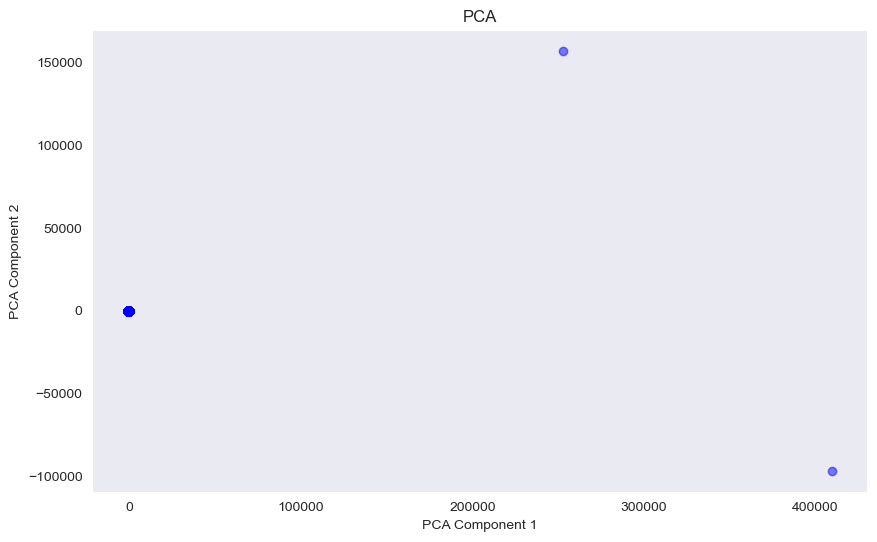

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


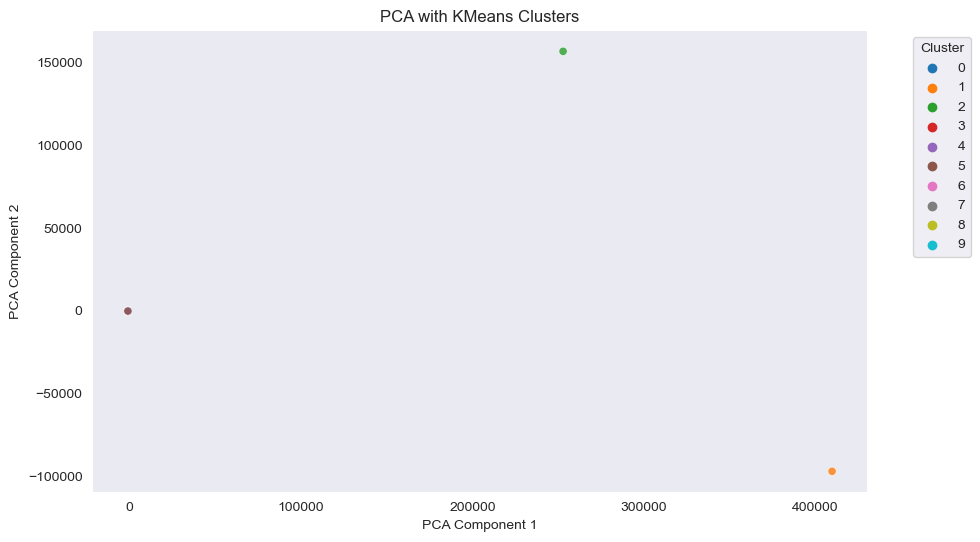

In [123]:
pca = PCA(n_components=2, random_state=123)
pca_results = pca.fit_transform(df)

plt.figure(figsize=(10, 6))
plt.scatter(pca_results[:, 0], pca_results[:, 1], c='blue', alpha=0.5)
plt.title('PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid()
plt.show()

kmeans = KMeans(n_clusters=10, random_state=123)
kmeans.fit(df)
df['cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_results[:, 0], y=pca_results[:, 1], hue=df['cluster'], palette='tab10', legend='full', alpha=0.8)
plt.title('PCA with KMeans Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()